In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
%matplotlib inline
import seaborn as sns

import sklearn as sk
from matplotlib import pyplot as plt

import scipy.stats as stats

In [2]:
# https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

# load data set as a dict
from sklearn.datasets import load_boston
boston = load_boston()


boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
# print description from within data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# create dataframe specifying column names
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# add price column from target dict
boston_df['MEDV'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [7]:
# print summary stats
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d

https://seaborn.pydata.org/tutorial/distributions.html

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

exploratory visual analysis of dataset

Target is the price, begin by potting disribution of the sale price.  Histogram fits a kernel density estimate.



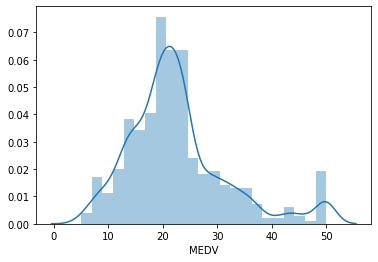

In [8]:
sns.distplot(boston_df['MEDV']);

https://seaborn.pydata.org/tutorial/distributions.html

Use scatter plots to understand pairwise relationships with other variables

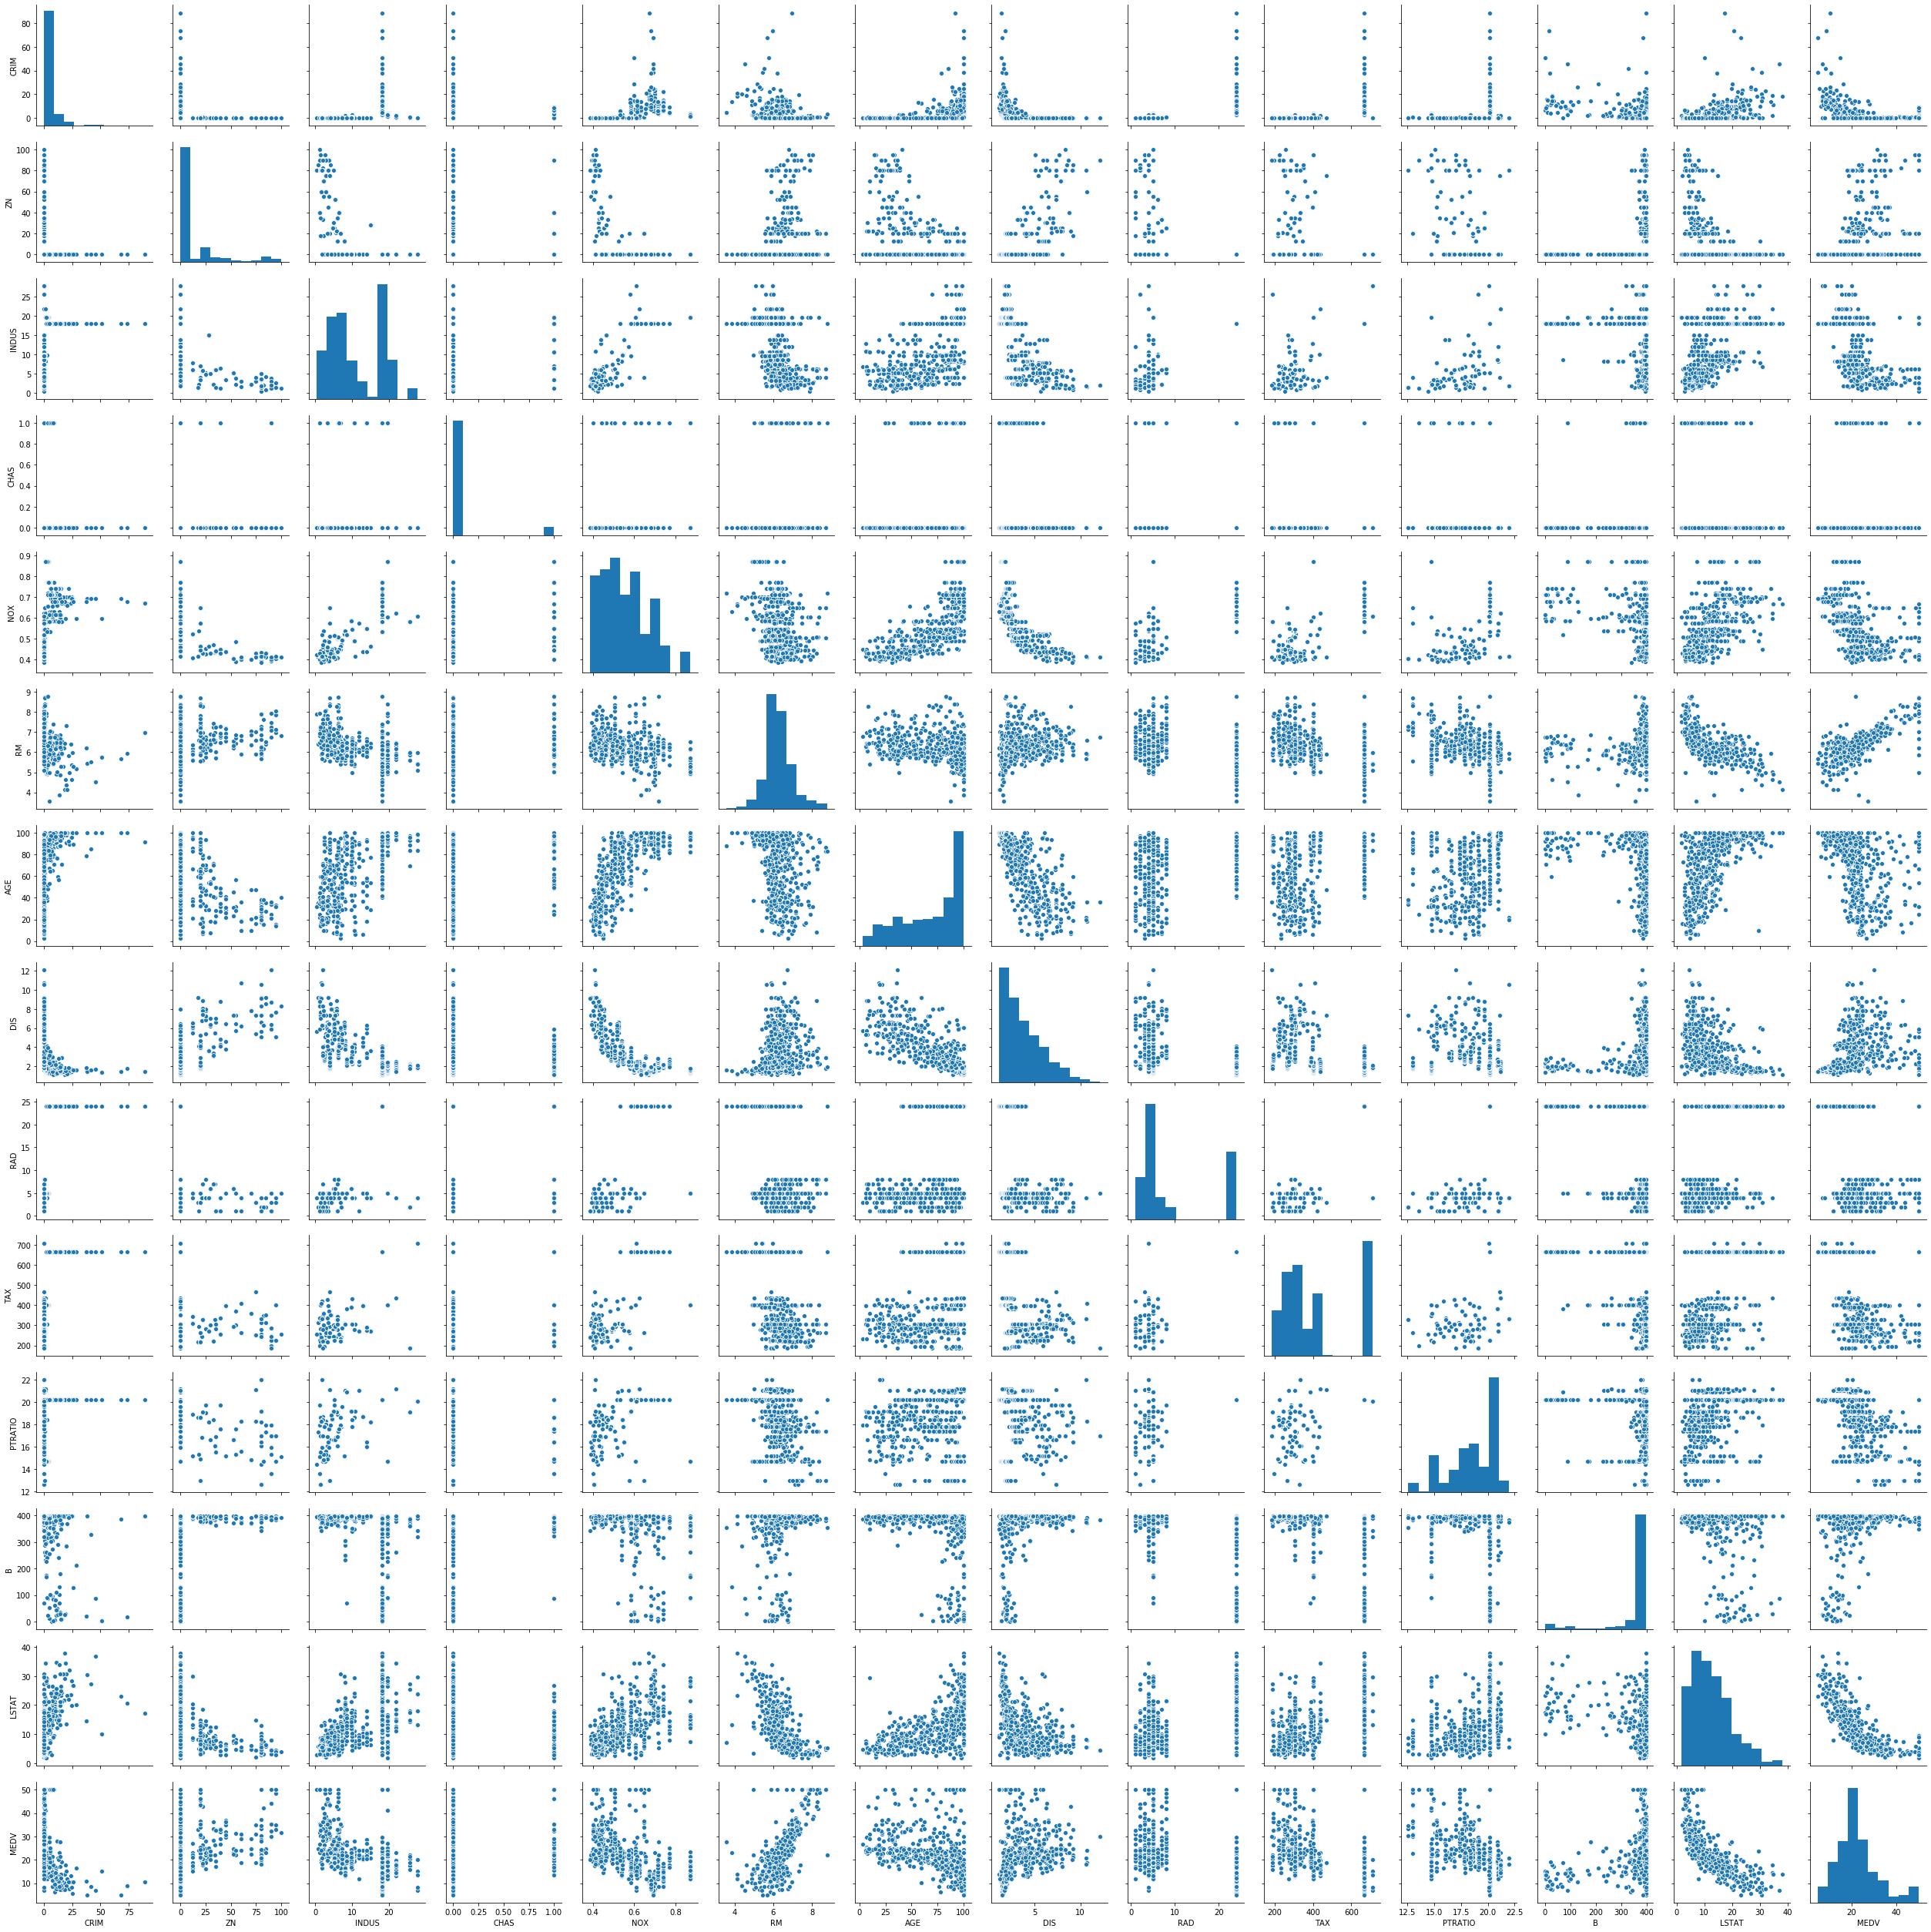

In [9]:
plot = sns.pairplot(boston_df);

# save as png for easier viewing

plot.savefig('plot.png')

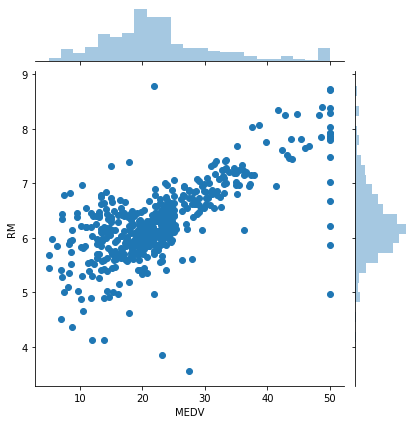

In [10]:
# correlation between RM (rooms per dwelling) and price

sns.jointplot(x="MEDV", y="RM", data=boston_df);

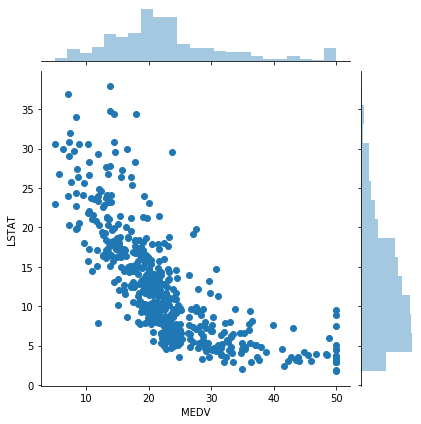

In [11]:
# correlation between LSTAT (% lower status of dwelling) and price

sns.jointplot(x="MEDV", y="LSTAT", data=boston_df);

In [12]:
# investigate linear regression model from RM/Price https://realpython.com/linear-regression-in-python/

from sklearn.linear_model import LinearRegression

# create numpy 2d array from dataframe
x = boston_df.as_matrix(columns=['MEDV'])
y = boston_df.as_matrix(columns=['RM'])

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.483525455991334
intercept: [5.08763867]
slope: [[0.05312235]]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


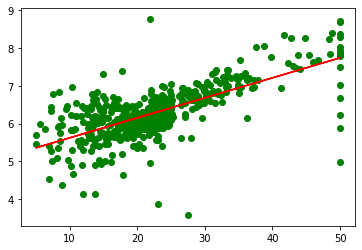

In [13]:
plt.scatter(x, y,color='g')
plt.plot(x, model.predict(x),color='r')

# plt.show()



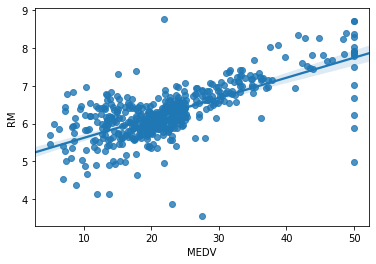

In [14]:
sns.regplot(x='MEDV', y='RM', data=boston_df)

In [15]:
# https://www.slideshare.net/DerekKane/data-science-iv-regression-analysis-anova



## Correlation Matrix

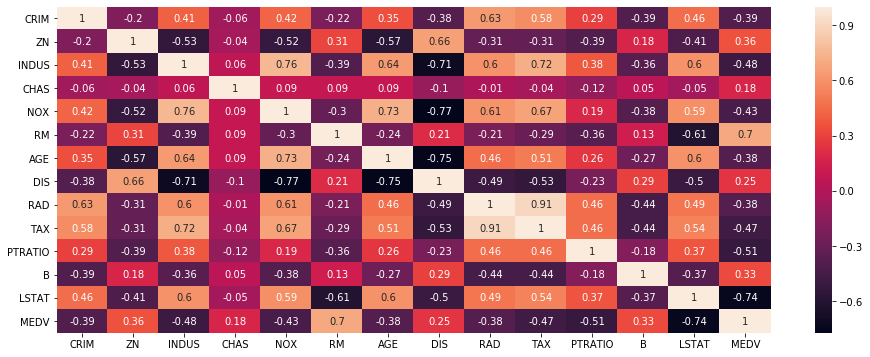

In [16]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#https://www.displayr.com/what-is-a-correlation-matrix/  
#https://corporatefinanceinstitute.com/resources/knowledge/finance/correlation/

#correlation co efficient

correlation_matrix = boston_df.corr().round(2)


plt.figure(figsize=(16, 6))
sns.heatmap(data=correlation_matrix, annot=True)


The above table indicates a high correlation between the RM and PRICE and a high negative correlation between the LSTAT and PRICE.  This corroborates what we had previously seen in the data visualisation.


Explain the opservations and hypothesesis i.e more rooms = higher medv, lower LSTAT = higher medv

## ANOVA for RM variable

The RM varibale looks to be equally distributed, the summary statistics show that the mean value for the sample is 6.284634, the T Test will determine if this is representative of the entire population.

In [17]:
from scipy import stats

#https://stattrek.com/statistics/dictionary.aspx?definition=one-sample%20t-test

stats.ttest_1samp(boston_df['RM'],round(boston_df['RM'].mean(),0))


Ttest_1sampResult(statistic=9.112633071931283, pvalue=1.8875570126590532e-18)

In [18]:
stats.describe(boston_df['RM'])

DescribeResult(nobs=506, minmax=(3.561, 8.78), mean=6.284634387351779, variance=0.49367085022110907, skewness=0.40241466802496245, kurtosis=1.8610269725310244)

In [19]:
stats.ttest_1samp(boston_df['MEDV'], boston_df['MEDV'].mean())

Ttest_1sampResult(statistic=-5.213574878236998e-14, pvalue=0.9999999999999585)

### Investigate relationship between House Price and whether the house borders the river

Houses that border the river are indicated the CHAS variable which is a 1 for properties that border the river and a 0 otherwise.  It is difficult to know how this variable will affect the house price without knowing a bit more about the river in question, if a river is prone to flooding we would expect house prices to be less but if not nad it is  a scenic river then we would expect them to be more.  Lets see if we can infer this from the data.

The correlation matirix displays a 0.18 correlation suggesting there is no direct relationship between the variables and this makes sense because it is a binary quantity.  Lets have a look at the variables that do show a correlation and see if we can identify any trends.


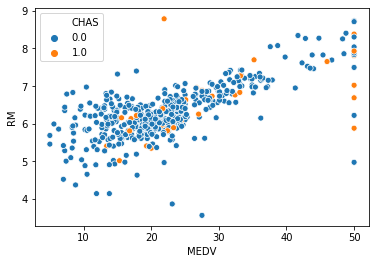

In [42]:
ax = sns.scatterplot(x='MEDV', y='RM',hue='CHAS', data=boston_df)

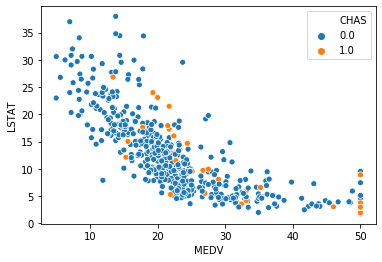

In [41]:
ax = sns.scatterplot(x='MEDV', y='LSTAT',hue='CHAS', data=boston_df)

There does not seem to be any distinction with the river properties here, lets have a look at another pairplot to see if we can see any patterns.

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


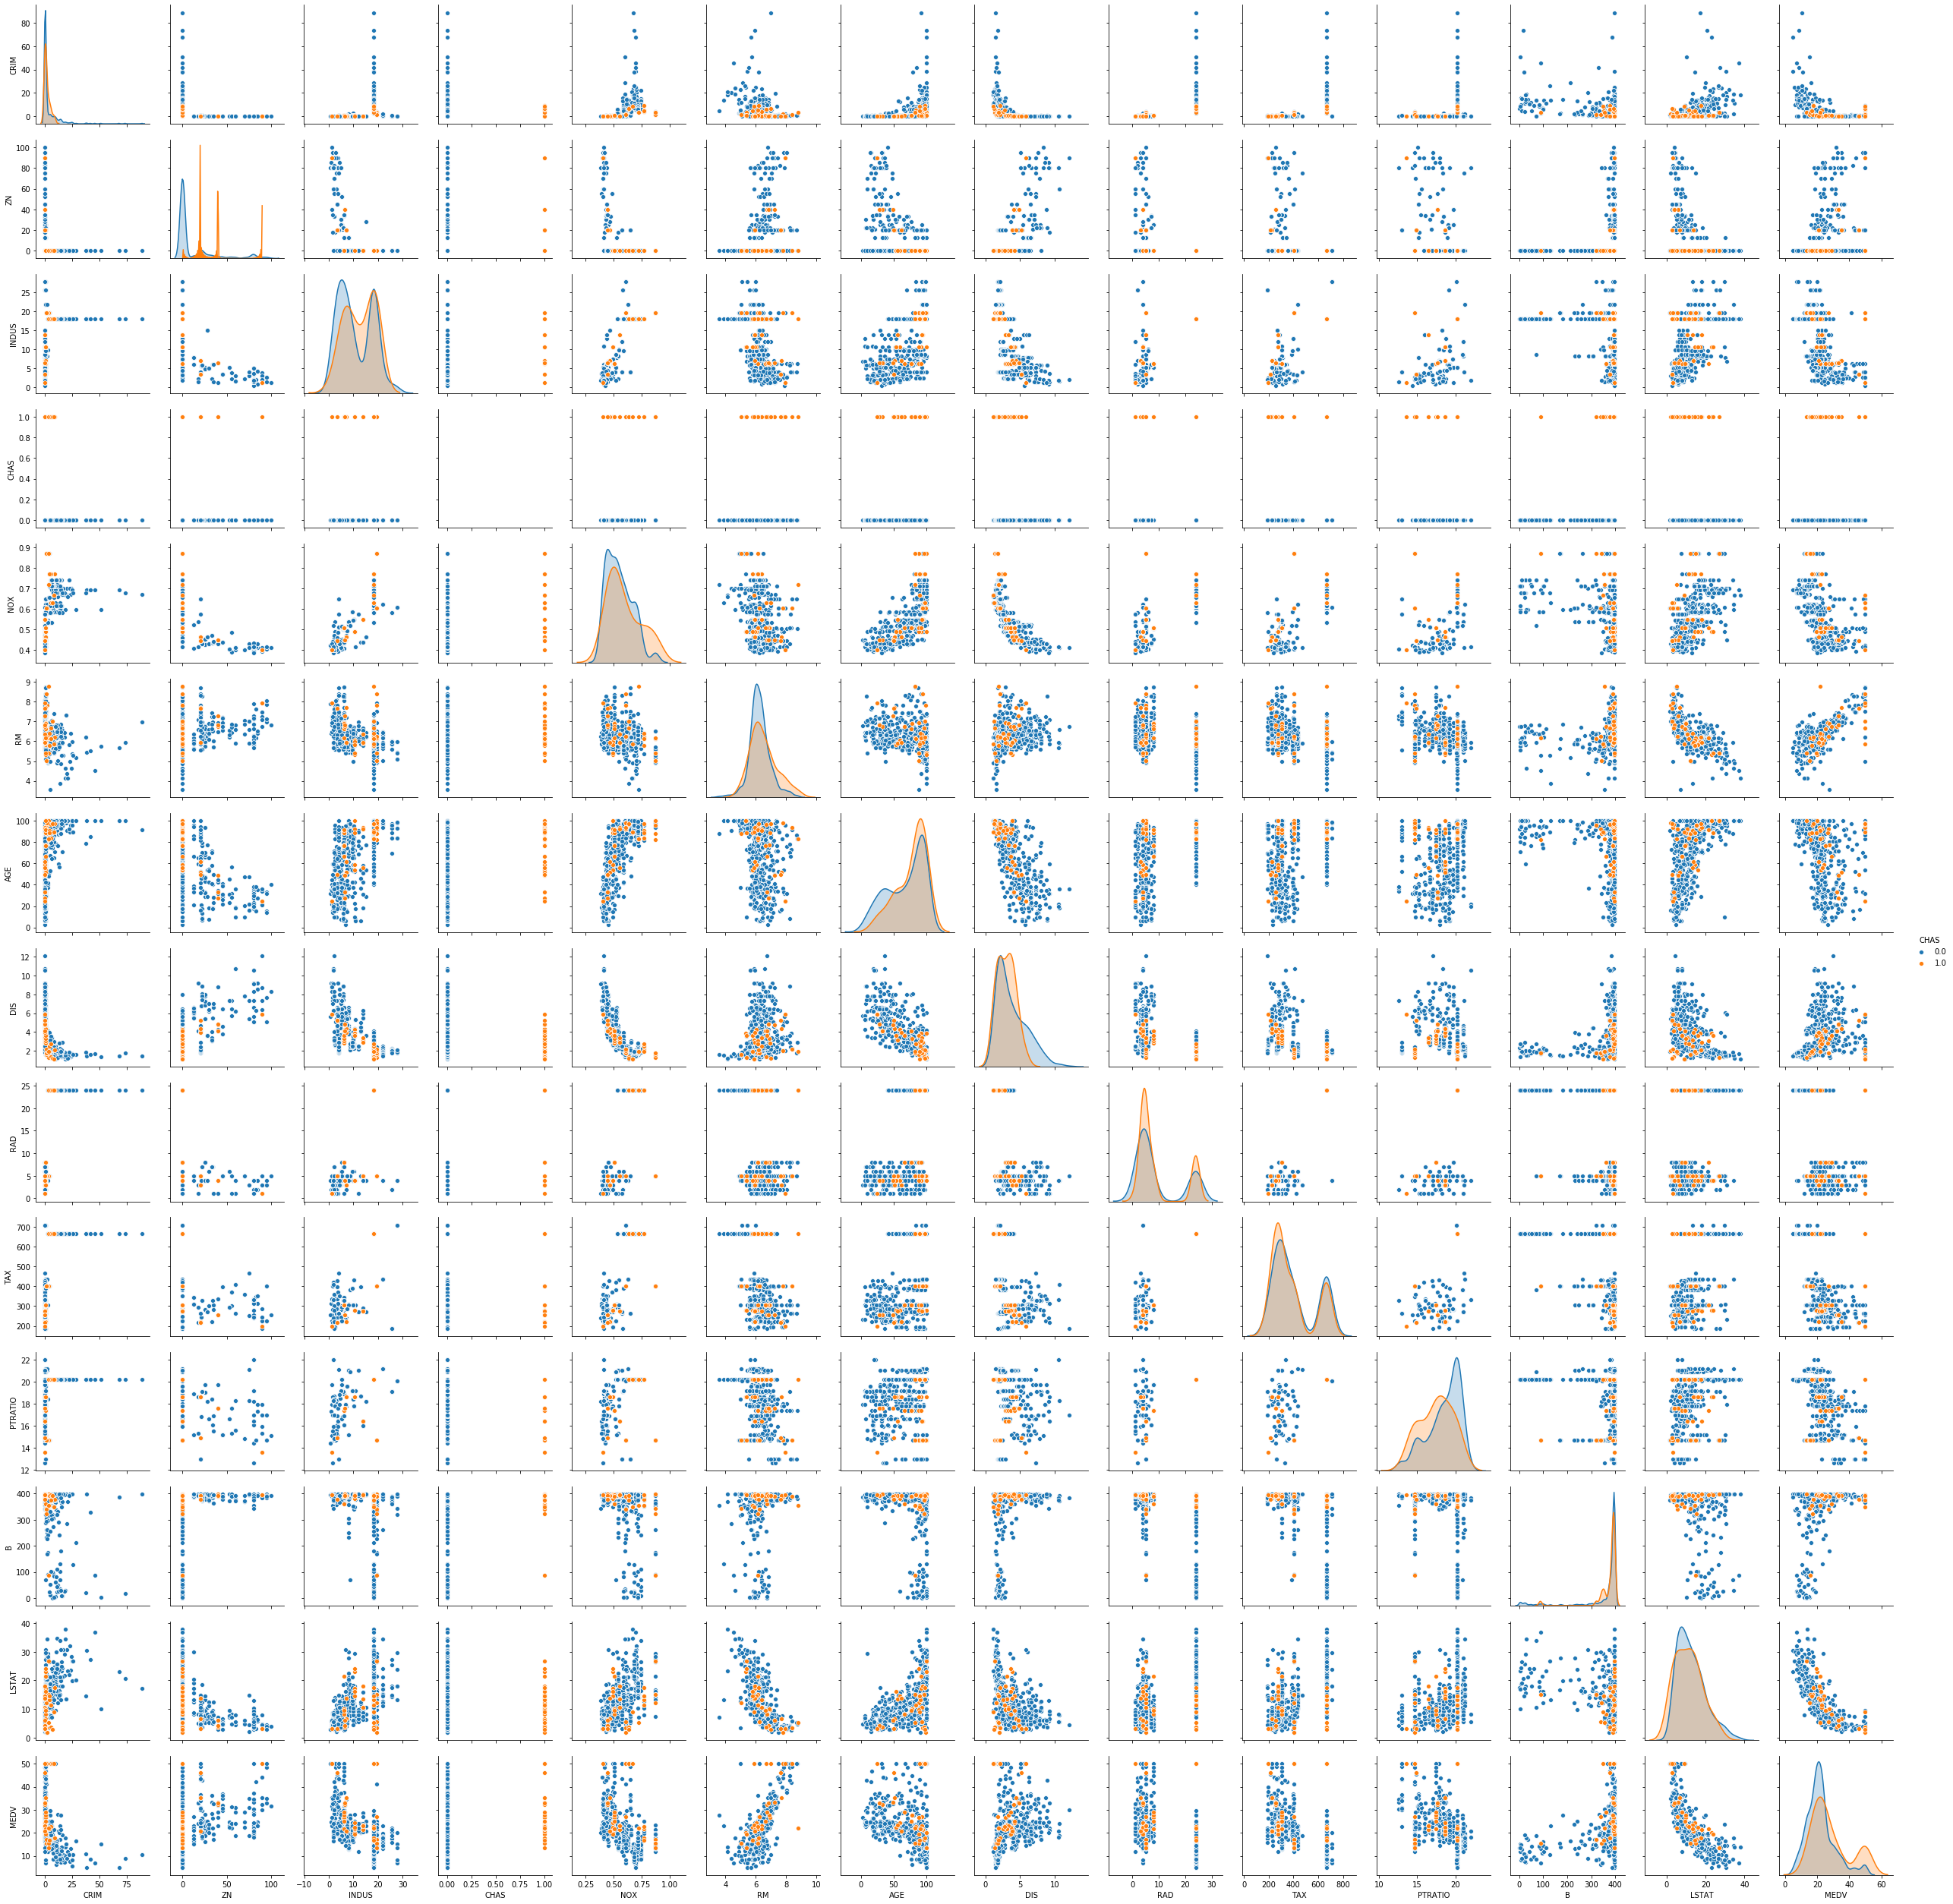

In [44]:
plot = sns.pairplot(boston_df,hue='CHAS');

If we look at the MEDV row there are some observations we can make about the properties by the river:
    
* Properties by the river tend to have a low crime rate
* Properties by the river tend to have a higher B value
* Properties by the river have a low proprtion of land zoned for larger properties (ZN)
* There appears to be more of a linear relationship in the DIS variable with properties close to the river
* The distribution indicates that houses by the river are distributed into two clusters, this is reflected in the distribution of properties elsewhere but more pronounced by the river.

We will take a closer look at the distribution plots for both prorperty types.  First we will seperate the datasets, calculate some summary statistics and then plot the distributions.

In [171]:
# seperate data set into CHAS = 1 AND CHAS = 0
chas_1 = boston_df[boston_df['CHAS']==1]
chas_0 = boston_df[boston_df['CHAS']==0]


In [52]:
chas_1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.851670,7.714286,12.719143,1.0,0.593426,6.519600,77.50000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000
std,2.494072,18.800143,5.957623,0.0,0.144736,0.876416,22.02134,1.254728,8.248962,165.012004,2.081766,53.382820,6.686651,11.816643
min,0.015010,0.000000,1.210000,1.0,0.401000,5.012000,24.80000,1.129600,1.000000,198.000000,13.600000,88.010000,1.920000,13.400000
25%,0.125060,0.000000,6.410000,1.0,0.489000,5.935500,60.30000,1.904700,4.000000,276.000000,15.650000,376.200000,5.395000,21.100000
50%,0.447910,0.000000,13.890000,1.0,0.550000,6.250000,88.50000,3.048000,5.000000,307.000000,17.600000,390.770000,10.500000,23.300000
75%,3.397665,0.000000,18.100000,1.0,0.693000,6.915000,93.20000,3.897300,8.000000,403.000000,18.600000,393.595000,15.070000,33.150000
max,8.982960,90.000000,19.580000,1.0,0.871000,8.780000,100.00000,5.885000,24.000000,666.000000,20.200000,396.900000,26.820000,50.000000


In [53]:
chas_0.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,471.000000,471.000000,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3.744447,11.634820,11.019193,0.0,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461040,12.757941,22.093843
std,8.876818,23.617979,6.913850,0.0,0.113102,0.685895,28.458924,2.145567,8.748452,168.853790,2.155958,93.423542,7.169271,8.831362
min,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079640,0.000000,5.040000,0.0,0.448000,5.882000,42.500000,2.105250,4.000000,282.500000,17.400000,375.365000,7.160000,16.600000
50%,0.245220,0.000000,8.560000,0.0,0.538000,6.202000,76.500000,3.215700,5.000000,330.000000,19.100000,391.830000,11.380000,20.900000
75%,3.695030,12.500000,18.100000,0.0,0.624000,6.594000,94.100000,5.287300,24.000000,666.000000,20.200000,396.375000,17.095000,24.800000
max,88.976200,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Looking at the summary statistics we can see that we only have 35 properties by the river compared to 471 elsewhere. This is a relatively small sample size.  We can also confirm our observations about the distribution and the properties by the river have a higher range of values and std deviation than elsewhere.

Lets have a closer look at the distributions of the MEDV for the properties by the river:

(array([5., 4., 9., 5., 1., 4., 0., 0., 1., 6.]),
 array([13.4 , 17.06, 20.72, 24.38, 28.04, 31.7 , 35.36, 39.02, 42.68,
        46.34, 50.  ]),
 <a list of 10 Patch objects>)

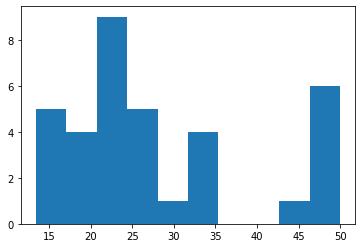

In [71]:
plt.hist(chas_1['MEDV'])

We can see that the higher reported mean is not an accurate measue due to the two clusters of data.  The majority of the sample falls into a lower price bracket and it is offest by 7 properties in the higher price bracket.

Lets refer back to the DIS variable and have a closer look at the linear relationship there.

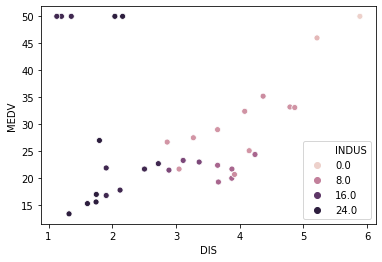

In [173]:
ax = sns.scatterplot(x='DIS', y='MEDV', hue='INDUS', data=chas_1)

If the INDUS is included we can see that the properties with a highe MEDV also have a high INDUS values unlike the other higher values properties.  Removing these high value properties in retail zones could provide a good linear regression model, lets do that and have a look at the results:

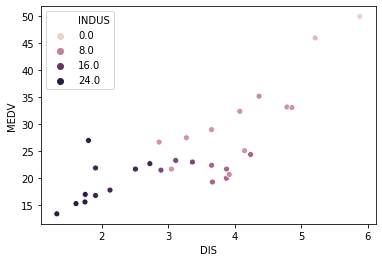

In [174]:
# exclude from dataset any properties over 35k with indus value over 12
chas_1 = chas_1.loc[~((chas_1['MEDV'] > 35) & (chas_1['INDUS'] > 12)),:]

ax = sns.scatterplot(x='DIS', y='MEDV', hue='INDUS', data=chas_1)


coefficient of determination: 0.6438710321496135
intercept: [6.18557013]
slope: [[5.70394317]]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


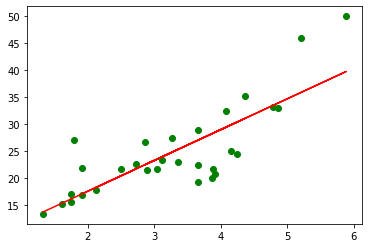

In [175]:
from sklearn.linear_model import LinearRegression

# create numpy 2d array from dataframe
x = chas_1.as_matrix(columns=['DIS'])
y = chas_1.as_matrix(columns=['MEDV'])

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

plt.scatter(x, y,color='g')
plt.plot(x, model.predict(x),color='r')

The plot shows the linear regression model diverges from the trend in the higher property prices but there is very little data here to confirm if these do correlate so the model is produced from the data in the mid range values.

### Keras Tutorial

In [20]:
#https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
#folloiwng tutorial

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



In [21]:
# load dataset

dataset = boston_df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [22]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [23]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))



Baseline: -30.90 (20.84) MSE


## Split and Randomise data

In [24]:
from sklearn.model_selection import train_test_split

X = boston_df.drop(['MEDV'], axis=1)
Y = boston_df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


## Build and Train Neural Network

In [25]:
import keras as kr

Using TensorFlow backend.


In [26]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

m = Sequential()
m.add(Dense(10, input_dim=13, kernel_initializer='normal', activation='relu'))
m.add(Dense(30, activation='relu'))
m.add(Dense(100, activation='linear'))
m.add(Dense(1, activation='linear'))

m.compile(loss='mean_squared_error', optimizer='adam')

Initially with 2-3 layers struggling to get loss below 20,

relu and linear activations seem to provide the best fit

softmax also failed to decrease losses, tanh also threw solution

interestingly reducing layer dim for second and fourth reduced mse

removing third 'linear layer and reducing second from 40-20 reduced mse to <90

epoch increase from 50 to 100 resulted in higher mse ~105

using only 'correlated' inputs (RM and LSTAT) resulted in higher mse



In [27]:
m.fit(X_train, Y_train, epochs = 60, batch_size=5)

Train on 404 samples
Epoch 1/60
404/404 [==============================] - 0s 1ms/sample - loss: 143.9516
Epoch 2/60
404/404 [==============================] - 0s 387us/sample - loss: 58.4287
Epoch 3/60
404/404 [==============================] - 0s 351us/sample - loss: 52.7888
Epoch 4/60
404/404 [==============================] - 0s 343us/sample - loss: 54.2158
Epoch 5/60
404/404 [==============================] - 0s 369us/sample - loss: 51.4830
Epoch 6/60
404/404 [==============================] - 0s 326us/sample - loss: 49.3724
Epoch 7/60
404/404 [==============================] - 0s 330us/sample - loss: 45.8813
Epoch 8/60
404/404 [==============================] - 0s 350us/sample - loss: 43.0909
Epoch 9/60
404/404 [==============================] - 0s 382us/sample - loss: 39.9442
Epoch 10/60
404/404 [==============================] - 0s 299us/sample - loss: 39.9179
Epoch 11/60
404/404 [==============================] - 0s 293us/sample - loss: 35.9883
Epoch 12/60
404/404 [===========

In [54]:
# dist = m.predict(inputs) - outputs.as_matrix()
# sns.distplot(dist)
# print('Mean: ', dist.mean())
# print('std: ', dist.std())

In [55]:
m.predict(X_train).T

array([[21.389301 , 12.914276 ,  9.719903 , 18.524488 , 20.257748 ,
        17.488    , 31.320885 , 21.215307 , 10.727172 , 17.537848 ,
        22.87289  , 22.868212 , 22.904854 , 12.56388  , 16.370405 ,
        19.610844 , 10.062352 , 19.040842 , 45.273758 , 29.37906  ,
        19.993736 , 13.827525 , 17.561544 , 25.632227 ,  9.954782 ,
        11.768129 , 22.101683 , 29.948334 , 34.858643 ,  6.717168 ,
        36.431175 , 24.317373 , 13.554652 , 22.94749  , 22.354334 ,
        30.452957 ,  9.918918 ,  8.19066  , 26.230356 , 11.120803 ,
        13.903962 , 18.072224 ,  5.973867 , 13.798432 , 38.37283  ,
        26.485231 , 23.394041 , 22.740465 , 10.961049 , 19.070013 ,
        38.655224 , 20.122791 , 10.447667 , 19.454523 , 23.73704  ,
        11.354063 , 12.37848  , 24.79106  , 10.420905 , 10.814873 ,
        16.276428 , 14.630973 , 30.987097 , 18.391071 , 23.002586 ,
        13.523801 , 19.017527 , 10.20785  , 23.570288 , 16.91248  ,
        22.299839 , 38.875824 , 26.664785 , 11.5

In [56]:
Y_train.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([19.7, 23.1, 13.5, 21.2, 23.1, 13.6, 22.8, 18.2, 13.1, 23.2, 22.8,
       25.1, 18.9, 10.9, 19.3, 17.4, 15.6, 20.6, 50. , 32.7, 21.8, 13.4,
       16.6, 23.6, 11. , 23.8, 23.1, 33.2, 28.2,  8.5, 32.4, 29.6, 17.1,
       24.2, 26.4, 33.2, 10.5,  8.8, 28. , 10.5, 15.4, 15.3, 10.4, 15.7,
       43.1, 24.7, 21. , 19.4, 10.9, 21.7, 38.7, 19.2, 12. , 17.5, 23.9,
        9.7, 15.4, 26.5, 10.8, 12.7, 18.4, 15.2, 29.8, 20. , 23.8, 14.6,
       19.8, 10.2, 23.7, 18.7, 20.3, 50. , 25. , 14.8,  9.5, 33. , 19.4,
       15.6, 20.2, 21.7, 24.7, 19.5,  7.2, 31.7, 22.4, 14.1, 21.4, 21.7,
       23. , 20.3, 30.7, 35.1, 20.9, 27. , 10.2, 22.4, 23.3, 33.1, 28.7,
       31.6, 22.2, 17.4, 16.1, 23. , 35.4, 22.9, 34.9, 19.5, 21. , 24.8,
       30.5, 36.5, 21.5, 17.5, 19.4, 34.7, 19.6, 25. , 13.9, 13.3, 18.5,
       12.3, 20. , 22. , 13.6, 14.9, 32. , 22.5, 23.9, 50. , 13.8, 20.1,
       20.8, 18.8, 50. , 22.2, 26.2, 20.1, 13.8, 19.8, 17.8, 24.1, 19.4,
       22.3, 20. , 13.3, 21. , 29.1, 22.7, 18.2, 21

In [57]:
m.evaluate(X_test, Y_test)

102/102 [==============================] - 0s 1ms/sample - loss: 31.6819


31.681911449806364

## Scaling

In [58]:
Try this https://medium.com/@robertjohn_15390/simple-housing-price-prediction-using-neural-networks-with-tensorflow-8b486d3db3ca

SyntaxError: invalid syntax (<ipython-input-58-e1ea76ee1e3a>, line 1)

In [59]:
import sklearn.preprocessing as pre

scaler = pre.StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [60]:
m = Sequential()
m.add(Dense(10, input_dim=13, kernel_initializer='normal', activation='relu'))
m.add(Dense(30, activation='relu'))
m.add(Dense(100, activation='linear'))
m.add(Dense(1, activation='linear'))

m.compile(loss='mean_squared_error', optimizer='adam')

m.fit(X_train_scaled, Y_train, epochs = 60, batch_size=5)

Train on 404 samples
Epoch 1/60
404/404 [==============================] - 0s 1ms/sample - loss: 395.8494
Epoch 2/60
404/404 [==============================] - 0s 324us/sample - loss: 51.0482
Epoch 3/60
404/404 [==============================] - 0s 321us/sample - loss: 25.9545
Epoch 4/60
404/404 [==============================] - 0s 343us/sample - loss: 19.6528
Epoch 5/60
404/404 [==============================] - 0s 326us/sample - loss: 17.8078
Epoch 6/60
404/404 [==============================] - 0s 363us/sample - loss: 16.2045
Epoch 7/60
404/404 [==============================] - 0s 345us/sample - loss: 14.6880
Epoch 8/60
404/404 [==============================] - 0s 343us/sample - loss: 14.6253
Epoch 9/60
404/404 [==============================] - 0s 351us/sample - loss: 13.0562
Epoch 10/60
404/404 [==============================] - 0s 318us/sample - loss: 12.6824
Epoch 11/60
404/404 [==============================] - 0s 339us/sample - loss: 11.9775
Epoch 12/60
404/404 [===========

In [61]:
m.evaluate(X_test_scaled, Y_test)

102/102 [==============================] - 0s 1ms/sample - loss: 13.3683


13.368344334995045

## Whitening

In [62]:
import sklearn.decomposition as dec

pca = dec.PCA(n_components=13, whiten=True)
pca.fit(X_train)
X_train_white = pd.DataFrame(pca.transform(X_train))
X_test_white = pd.DataFrame(pca.transform(X_test))

In [63]:
m = Sequential()
m.add(Dense(10, input_dim=13, kernel_initializer='normal', activation='relu'))
m.add(Dense(30, activation='relu'))
m.add(Dense(100, activation='linear'))
m.add(Dense(1, activation='linear'))

m.compile(loss='mean_squared_error', optimizer='adam')

m.fit(X_train_white, Y_train, epochs = 60, batch_size=5)

Train on 404 samples
Epoch 1/60
404/404 [==============================] - 0s 1ms/sample - loss: 412.1153
Epoch 2/60
404/404 [==============================] - 0s 416us/sample - loss: 43.1303
Epoch 3/60
404/404 [==============================] - 0s 458us/sample - loss: 16.8795
Epoch 4/60
404/404 [==============================] - 0s 359us/sample - loss: 14.2007
Epoch 5/60
404/404 [==============================] - 0s 393us/sample - loss: 13.4726
Epoch 6/60
404/404 [==============================] - 0s 384us/sample - loss: 12.8603
Epoch 7/60
404/404 [==============================] - 0s 340us/sample - loss: 12.0934
Epoch 8/60
404/404 [==============================] - 0s 329us/sample - loss: 11.8876
Epoch 9/60
404/404 [==============================] - 0s 321us/sample - loss: 11.7967
Epoch 10/60
404/404 [==============================] - 0s 322us/sample - loss: 10.9577
Epoch 11/60
404/404 [==============================] - 0s 318us/sample - loss: 10.7717
Epoch 12/60
404/404 [===========

In [64]:
m.evaluate(X_test_white, Y_test)

102/102 [==============================] - 0s 1ms/sample - loss: 12.1876


12.187647660573324